In [1]:
import sys
import asyncio
import logging
import numpy as np
import matplotlib.pyplot as plt
from lsst.ts.externalscripts.auxtel.latiss_cwfs_align import LatissCWFSAlign
import time
from lsst.ts import salobj

In [2]:
# Temporarily needed to run at summit
import os
os.environ["LSST_DDS_DOMAIN"] = 'lsatmcs'
os.environ["OSPL_URI"] = "file:///home/patrickingraham/ospl.xml"

In [3]:
script = LatissCWFSAlign(index=1, remotes=True)
script.dataPath='/project/shared/auxTel/'

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages


In [4]:
# # To test a single pair of images
# script.angle = 0.
# script.intra_visit_id = 2020012800333
# script.extra_visit_id = 2020012800334

RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 10 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 10 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 36 messages


In [5]:
stream_handler = logging.StreamHandler(sys.stdout)
# if you want logging
logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 10 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 11 messages
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 38 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 12 messages
Read historical data in 0.28 sec
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 29 messages
RemoteEvent(ATPneumatics, 0, heartbeat) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 30 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 31 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 77 messages


In [14]:
script.filter='BG40'
script.grating = 'empty_1'
script.exposure_time = 30

In [268]:
offset = {'x':0.5  , 'y': 0. , 'z':  0.0}
await script.attcs.ataos.cmd_offset.set_start(**offset)

Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429649069824 and this is thread id 140437735069504.
Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429649069824 and this is thread id 140437735069504.


In [228]:
await script.latiss.take_engtest(exptime=2,n=1)

Generating group_id
ENGTEST 0001 - 0001


array([2020031200255])

In [101]:
#apply hexapod focus offset
#await script.hexapod_offset(-0.02458927)
#await script.attcs.ataos.cmd_resetOffset.start()

In [236]:
script.binning = 1

Using binning factor of 1


In [269]:
script.intra_visit_id = None #2020031200173
script.extra_visit_id = None # 2020031200174
script.angle =0 

start_time=time.time()
await script.run_cwfs()
end_time=time.time()
print('WFE fitting took {0:0.3f} seconds'.format(end_time-start_time)) # 56.7s

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
intraImage expId for target: 2020031200270
extraImage expId for target: 2020031200271


/home/patrickingraham/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:310: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000270.yaml
AT_O_20200312_000270: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000270: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000270.yaml
AT_O_20200312_000270: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000270: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 14 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 31 messages


/home/patrickingraham/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:310: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000271.yaml
AT_O_20200312_000271: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000271: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000271.yaml
AT_O_20200312_000271: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000271: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 14 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 25 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
Running source detection algorithm
Remo

Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429827225344 and this is thread id 140437735069504.
Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429827225344 and this is thread id 140437735069504.
Exception ignore

RemoteTelemetry(ATMCS, 0, mount_Nasmyth_Encoders) falling behind; read 14 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 64 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling behind; read 14 messages
RemoteEvent(ATPtg, 0, heartbeat) falling behind; read 15 messages
RemoteTelemetry(ATMCS, 0, mount_AzEl_Encoders) falling behind; read 15 messages
RemoteEvent(ATDome, 0, heartbeat) falling behind; read 13 messages
RemoteTelemetry(ATPneumatics, 0, m1AirPressure) falling behind; read 14 messages
RemoteTelemetry(ATMCS, 0, measuredTorque) falling behind; read 15 messages
RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 14 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 21 messages
RemoteTelemetry(ATMCS, 0, measuredMotorVelocity) falling behind; read 15 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 70 messages
RemoteTelemetry(ATMCS, 0, azEl_mountMotorEncoders) falling behind; read 15 messages
RemoteEvent(A

In [141]:
await script.latiss.take_engtest(exptime=2,n=1)

Generating group_id
ENGTEST 0001 - 0001


array([2020031200215])

Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429818832640 and this is thread id 140437735069504.
Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429818832640 and this is thread id 140437735069504.


In [134]:
# await script.attcs.ataos.cmd_applyAxisOffset.set_start(axis='y', offset=-0.2)
# offset = {'x':-0.5 , 'y':0., 'z': 0.}
# await script.attcs.ataos.cmd_offset.set_start(**offset)

In [257]:
await script.attcs.slew_object('HD 68450', pa_ang=70)

Slewing to HD 68450: 08 11 01.6834 -37 17 32.541
Parallactic angle: 98.03011666959547 | Sky Angle: 167.2655095525693
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
Got False
Telescope not in position
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.012 | delta Az= -000.004 [Dome] delta Az = +000.264
[Telescope] delta Alt = +000.001 | delta Az= -000.003 [Dome] delta Az = +000.264
Axes in position.
None


Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429837195008 and this is thread id 140437735069504.
Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429837195008 and this is thread id 140437735069504.


In [212]:
script.camera_rotation_angle = 0.

In [273]:
script.angle = 20.

In [ ]:
Hexapod offset: [-0.46313467 -0.3134743   0.0059963 ]


Measured zernike coeficients: [-115.44016720623256, 12.25037167079098, -28.548236164419485]
De-rotated zernike coeficients: [-104.28839939   50.99444639  -28.54823616]
Hexapod offset: [-0.79609465 -0.38927058  0.0067972 ]
Telescope offsets: [-47.76567911 -23.35623499   0.        ]

[ -28.54823616   90.27440298   43.41525547 -115.44016721   12.25037167
  -57.83762681    2.63771479   43.85516343    6.40960567]


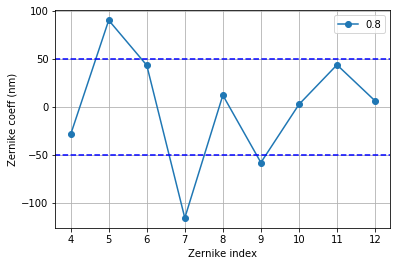

In [274]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [-71.05685727903321, 17.838021055245086, -25.184470292435073]
De-rotated zernike coeficients: [-72.87256696  -7.54061976 -25.18447029]
Hexapod offset: [-0.55627914  0.05756198  0.0059963 ]
Telescope offsets: [-33.37674823   3.45371897   0.        ]

[-25.18447029 122.63824298 -12.83744961 -71.05685728  17.83802106
 -15.19263854  34.6939235   31.89206138  17.89492895]


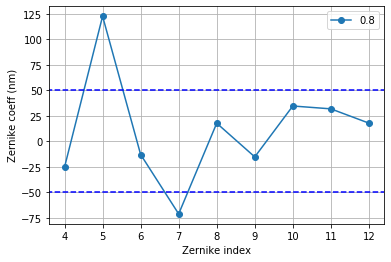

In [267]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [-3.9534318677409748, 19.53293511363829, 58.07214499076913]
De-rotated zernike coeficients: [-3.95343187 19.53293511 58.07214499]
Hexapod offset: [-0.03017887 -0.14910637 -0.0138267 ]
Telescope offsets: [-1.81073215 -8.94638249  0.        ]

[ 58.07214499  44.59534919  90.9523041   -3.95343187  19.53293511
 -49.19081189 -17.65569243  34.75570982  23.90331797]


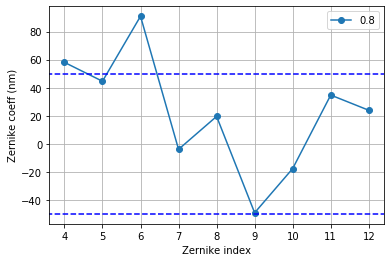

Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429649069824 and this is thread id 140437735069504.
Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429649069824 and this is thread id 140437735069504.


In [250]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [-57.50333859523393, 33.96903331347598, 20.76370317361084]
De-rotated zernike coeficients: [-57.5033386   33.96903331  20.76370317]
Hexapod offset: [-0.43895678 -0.2593056  -0.00494374]
Telescope offsets: [-26.33740699 -15.55833587   0.        ]

[ 20.76370317  69.47148756  53.25276613 -57.5033386   33.96903331
 -37.80143361  15.88887366  39.83255111  32.73631746]


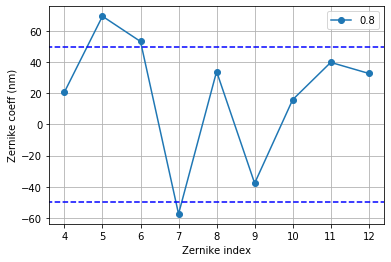

In [246]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [-36.424742095069696, 18.671213326606342, -77.19090258416769]
De-rotated zernike coeficients: [-36.4247421   18.67121333 -77.19090258]
Hexapod offset: [-0.27805147 -0.14252835  0.01837879]
Telescope offsets: [-16.68308798  -8.55170076   0.        ]

[-77.19090258  41.016918   107.59966052 -36.4247421   18.67121333
   2.31331727 -37.19863665  30.66931117  21.43031017]


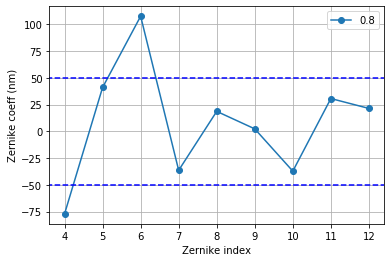

In [242]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [9.516113071511702, -78.90116164095969, -282.1603367360684]
De-rotated zernike coeficients: [   9.51611307  -78.90116164 -282.16033674]
Hexapod offset: [0.07264208 0.60229894 0.06718103]
Telescope offsets: [ 4.35852507 36.13793663  0.        ]

[-282.16033674    5.60129693   67.2855603     9.51611307  -78.90116164
  -19.24843496  -55.08850013   42.12809923   10.59153117]


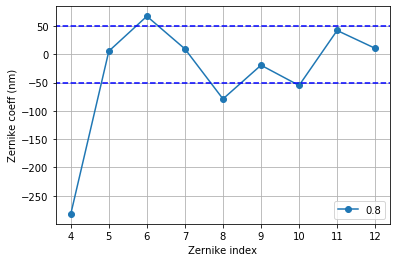

Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429827225344 and this is thread id 140437735069504.
Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429827225344 and this is thread id 140437735069504.


In [238]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [10.727119972865292, -124.28300525926714, -166.23334734495504]
De-rotated zernike coeficients: [  10.72711997 -124.28300526 -166.23334734]
Hexapod offset: [0.08188641 0.94872523 0.03957937]
Telescope offsets: [ 4.91318472 56.92351386  0.        ]

[-166.23334734    0.84378212    6.0089985    10.72711997 -124.28300526
  -15.77077943  -17.88713772   34.81972657    9.31475151]


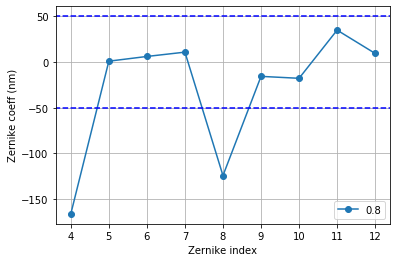

In [235]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [284.99514108295705, -78.86696185679087, -202.7949880787924]
De-rotated zernike coeficients: [ 284.99514108  -78.86696186 -202.79498808]
Hexapod offset: [2.17553543 0.60203788 0.04828452]
Telescope offsets: [130.53212569  36.12227261   0.        ]

[-202.79498808   15.73843014   50.28524785  284.99514108  -78.86696186
   12.1492272    -3.5585222    41.84923438   -0.86504665]


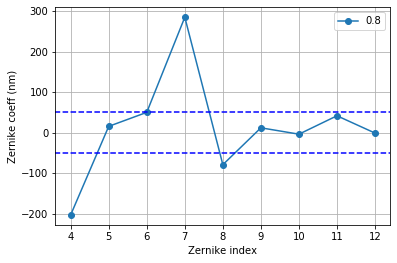

In [223]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [297.16952649838424, 180.41398624361088, -156.4835878700026]
De-rotated zernike coeficients: [ 180.41398624 -297.1695265  -156.48358787]
Hexapod offset: [-1.377206    2.26846967  0.037258  ]
Telescope offsets: [-82.63236011 136.10818008   0.        ]

[-156.48358787   35.73585926  -52.41494671  297.1695265   180.41398624
  -12.84817383   14.75390955   34.37388152   23.36509778]


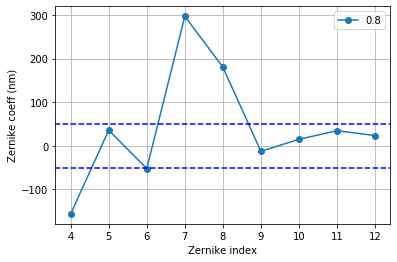

In [198]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [-9.860881807208262, -239.63589065335495, -129.19191790694035]
De-rotated zernike coeficients: [ 239.63589065   -9.86088181 -129.19191791]
Hexapod offset: [-1.48842168  0.06124771  0.03075998]
Telescope offsets: [-89.30530086   3.67486279   0.        ]

[-129.19191791   65.24569438   23.52377585   -9.86088181 -239.63589065
   -2.63020198  -18.50177947   33.64719229   12.49736409]


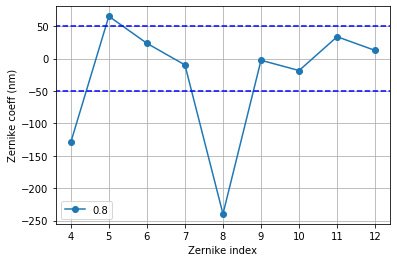

In [182]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [77.78732960256525, -144.49208884317946, -143.91072935243398]
De-rotated zernike coeficients: [ 144.49208884   77.7873296  -143.91072935]
Hexapod offset: [0.89746639 0.48315112 0.03426446]
Telescope offsets: [53.84798342 28.98906693  0.        ]

[-143.91072935   24.8560817    14.58989055   77.7873296  -144.49208884
  -22.63537469   -4.45000967   38.6750924     8.8344784 ]


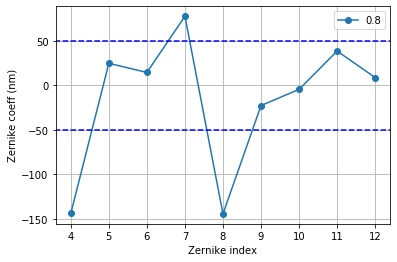

In [164]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [80.64186041232158, -7.196575800450307, -115.8103664618206]
De-rotated zernike coeficients: [   7.1965758    80.64186041 -115.81036646]
Hexapod offset: [0.04469923 0.50088112 0.0275739 ]
Telescope offsets: [ 2.68195371 30.05286723  0.        ]

[-115.81036646    2.07041193  -51.31253262   80.64186041   -7.1965758
  -11.08836696  -20.9955815    25.97054617   18.67345723]


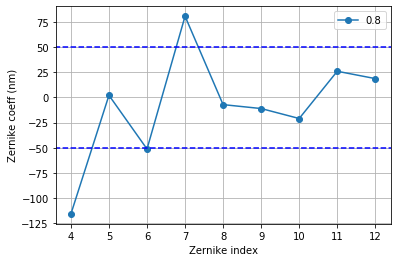

Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429818832640 and this is thread id 140437735069504.
Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429818832640 and this is thread id 140437735069504.
Exception ignore

In [160]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [226.1655180918803, 219.56444570897753, -114.91817548136594]
De-rotated zernike coeficients: [-219.56444571  226.16551809 -114.91817548]
Hexapod offset: [-1.36375432  1.40475477  0.02736147]
Telescope offsets: [-81.82525927  84.28528625   0.        ]

[-114.91817548   16.84970138   78.01900741  226.16551809  219.56444571
    7.04124522   18.00090176   36.39833284   -3.33448796]


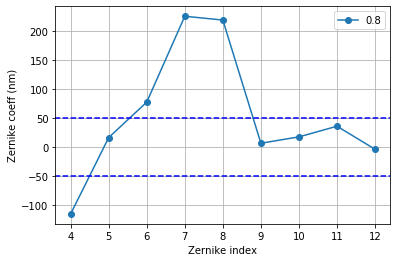

In [144]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [-104.77430729413534, -94.4462358698316, -70.37225830739342]
De-rotated zernike coeficients: [  94.44623587 -104.77430729  -70.37225831]
Hexapod offset: [ 0.58662258 -0.65077209  0.0167553 ]
Telescope offsets: [ 35.19735498 -39.0463257    0.        ]

[ -70.37225831    7.31297512   54.51725666 -104.77430729  -94.44623587
   12.86379781   22.58925047   35.0652553    -3.93932972]


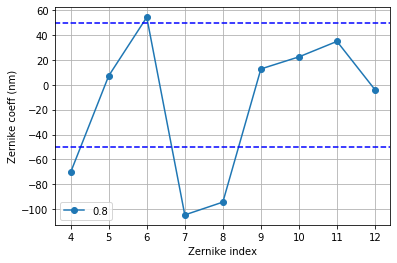

In [149]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [-77.22548091004325, -114.96369356365828, -78.90742654040034]
De-rotated zernike coeficients: [114.96369356 -77.22548091 -78.90742654]
Hexapod offset: [ 0.71406021 -0.47966137  0.01878748]
Telescope offsets: [ 42.84361251 -28.77968233   0.        ]

[ -78.90742654   -7.02964929   25.85145826  -77.22548091 -114.96369356
  -18.63894182  -21.33371012   24.70188024    5.8934113 ]


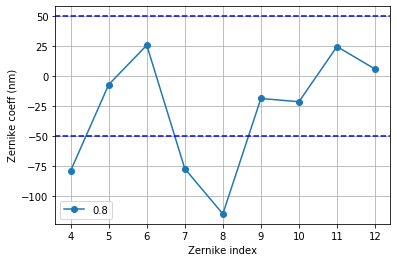

In [154]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [168.4073446801872, 215.2561693073421, -86.13828107892539]
De-rotated zernike coeficients: [-215.25616931  168.40734468  -86.13828108]
Hexapod offset: [-1.33699484  1.04600835  0.02050911]
Telescope offsets: [-80.21969043  62.76050112   0.        ]

[-86.13828108  43.70653839  57.1440833  168.40734468 215.25616931
  27.16921234  38.42722745  36.62051745  -1.32942656]


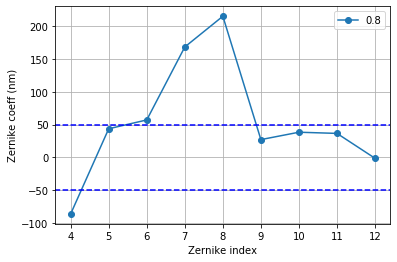

In [123]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [24.11262678766066, 123.83310506829828, -26.065961859791045]
De-rotated zernike coeficients: [  75.89143467 -100.77969451  -26.06596186]
Hexapod offset: [ 0.47137537 -0.62596084  0.00620618]
Telescope offsets: [ 28.28252224 -37.55765013   0.        ]

[-26.06596186  -5.60612783 -61.79925482  24.11262679 123.83310507
  12.09806315   0.9051597   34.13700083   5.3842708 ]


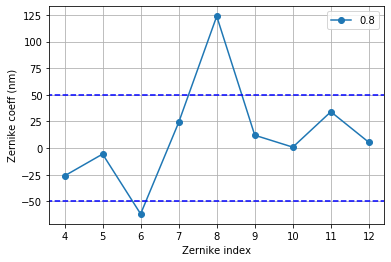

In [99]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

Measured zernike coeficients: [-98.14143591883675, 248.0615996299848, -24.203754543994066]
De-rotated zernike coeficients: [250.01513269 -93.05230831 -24.20375454]
Hexapod offset: [ 1.55288902 -0.57796465  0.0057628 ]
Telescope offsets: [ 93.17334138 -34.67787887   0.        ]

[-24.20375454 -29.69263471 -37.38902092 -98.14143592 248.06159963
 -14.59111186   3.38229786  35.2027247   -0.63627026]


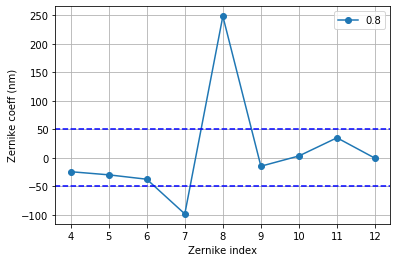

In [106]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

In [108]:
66+24, script.angle

(90, 42)

In [91]:
old_angle = script.angle

In [105]:
script.angle = 42

In [96]:
script.sensitivity_matrix

[[-0.007633587786259542, 0.0, 0.0],
 [0.0, 0.007633587786259542, 0.0],
 [0.0, 0.0, -0.0002380952380952381]]

In [222]:
script.sensitivity_matrix = [[1./131., 0., 0.], [0., -1./131., 0.], [0., 0., -1. / 4200.]]

In [209]:
script.sensitivity_matrix

[[-0.007633587786259542, 0.0, 0.0],
 [0.0, -0.007633587786259542, 0.0],
 [0.0, 0.0, -0.0002380952380952381]]

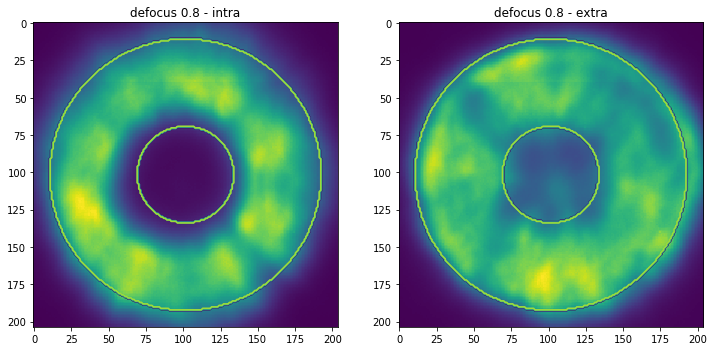

RemoteEvent(ATMCS, 0, target) falling behind; read 12 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages


In [256]:
# plot image and mask
fig1 = plt.figure(1, figsize=(12,8))
ax11 = fig1.add_subplot(121)
ax11.set_title("defocus 0.8 - intra")
ax11.imshow(script.I1[0].image0)
ax11.contour(script.algo.pMask) 
ax12 = fig1.add_subplot(122)
ax12.set_title("defocus 0.8 - extra")
ax12.imshow(script.I2[0].image0)
ax12.contour(script.algo.pMask) 

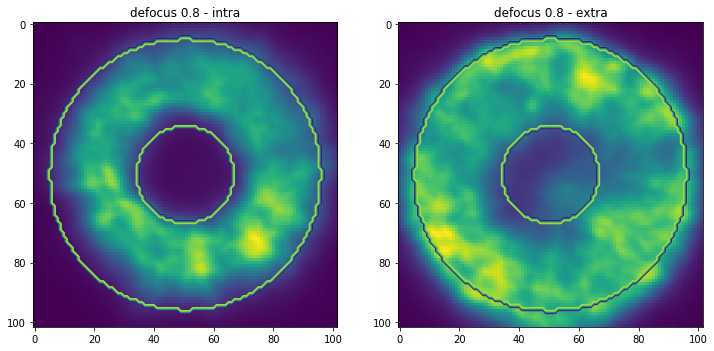

Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429836142336 and this is thread id 140437735069504.
Exception ignored in: <function SqlRegistry.__del__ at 0x7fba2858e5f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140429836142336 and this is thread id 140437735069504.
Exception ignore

In [38]:
# plot image and mask
fig1 = plt.figure(1, figsize=(12,8))
ax11 = fig1.add_subplot(121)
ax11.set_title("defocus 0.8 - intra")
ax11.imshow(script.I1[0].image0)
ax11.contour(script.algo.pMask) 
ax12 = fig1.add_subplot(122)
ax12.set_title("defocus 0.8 - extra")
ax12.imshow(script.I2[0].image0)
ax12.contour(script.algo.pMask) 

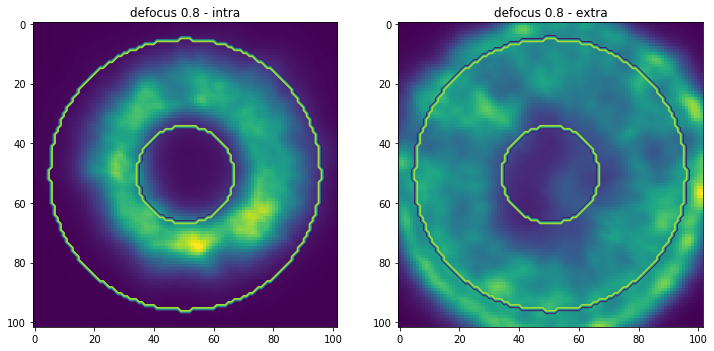

In [34]:
# plot image and mask
fig1 = plt.figure(1, figsize=(12,8))
ax11 = fig1.add_subplot(121)
ax11.set_title("defocus 0.8 - intra")
ax11.imshow(script.I1[0].image0)
ax11.contour(script.algo.pMask) 
ax12 = fig1.add_subplot(122)
ax12.set_title("defocus 0.8 - extra")
ax12.imshow(script.I2[0].image0)
ax12.contour(script.algo.pMask) 

## Take an in-focus image?

In [16]:
if True:
    # Start a logger to publish observer notes to the EFD
    # find it using SELECT "message" FROM "efd"."autogen"."lsst.sal.Script.logevent_logMessage" WHERE time > :dashboardTime:
    comment_log_controller = salobj.Controller("Script", index=1)
    #comment_log_controller.evt_logMessage.set_put(message="Starting In-focus post CWFS data current target: {}".format(target_name))
    comment_log_controller.evt_logMessage.set_put(message="Test: {}".format(time.time()))
    tmp = latiss.take_object(exptime=15, n=1)

RemoteEvent(ATMCS, 0, target) falling behind; read 20 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
Read historical data in 0.00 sec
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 60 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 19 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 14 messages


In [12]:
tmp = await script.attcs.atptg.evt_currentTarget.next(flush=True, timeout=15)
print(tmp)

TimeoutError: 

RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 13 messages


In [9]:
tmp = await script.attcs.atptg.evt_heartbeat.next(flush=True, timeout=15)

In [8]:
print(tmp)

private_revCode: 0fb69a21, private_sndStamp: 1584056369.5205276, private_rcvStamp: 1584056369.5207012, private_seqNum: 644738, private_origin: 35, private_host: 1, heartbeat: False, priority: 10


In [ ]:
script.attcs.slew_object